In [87]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [88]:
df = pd.read_csv(r"/content/drive/MyDrive/ML Intern/news.csv")

In [89]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [91]:
df.shape

(6335, 4)

In [92]:
# Check the distribution of labels
label_counts = df['label'].value_counts()
print("\nDistribution of labels:")
print(label_counts)


Distribution of labels:
REAL    3171
FAKE    3164
Name: label, dtype: int64


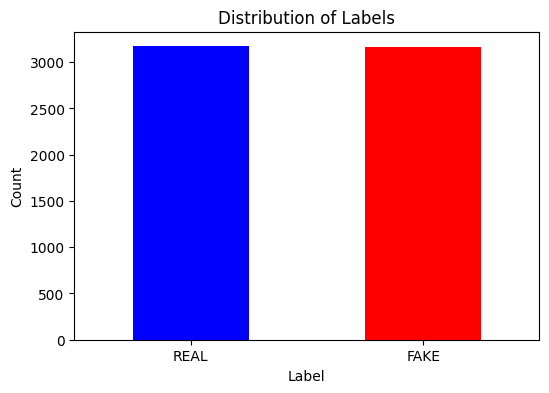

In [93]:
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [94]:
# Check the length of Title and Text columns
df['Title_length'] = df['title'].apply(len)
df['Text_length'] = df['text'].apply(len)

In [95]:
# Summary statistics of Title and Text length
print("\nSummary statistics of Title length:")
print(df['Title_length'].describe())
print("\nSummary statistics of Text length:")
print(df['Text_length'].describe())



Summary statistics of Title length:
count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: Title_length, dtype: float64

Summary statistics of Text length:
count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: Text_length, dtype: float64


Text(0, 0.5, 'Frequency')

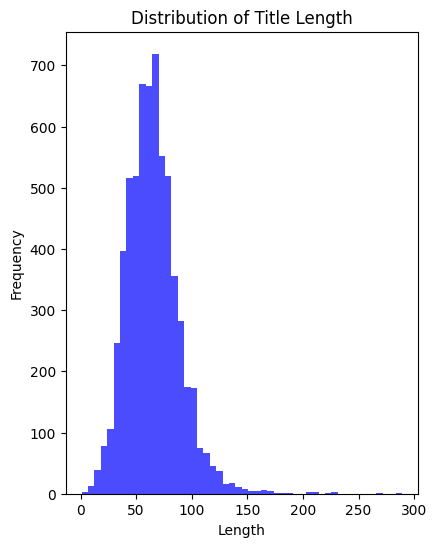

In [96]:
# Visualize the distribution of Title and Text length
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Title_length'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Title Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

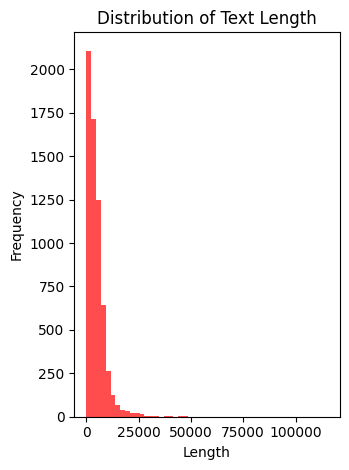

In [97]:
plt.subplot(1, 2, 2)
df['Text_length'].plot(kind='hist', bins=50, color='red', alpha=0.7)
plt.title('Distribution of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [98]:
# Split the dataset into features (X) and labels (y)
X = df['title'] + " " + df['text']  # Combine Title and Text columns into one feature
y = df['label']

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [101]:
# Train a Linear Support Vector Classifier (SVC) model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)


LinearSVC()

In [102]:
# Predict labels for the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9352801894238358

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [103]:
# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [104]:
# Predict labels for the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8484609313338595

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.97      0.71      0.82       628
        REAL       0.78      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.88      0.85      0.85      1267
weighted avg       0.87      0.85      0.85      1267



In [105]:
# Train a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [106]:
# Predict labels for the test set
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.9084451460142068

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.91      0.90      0.91       628
        REAL       0.91      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [107]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [108]:
# Predict labels for the test set
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.9131807419100236

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       628
        REAL       0.93      0.89      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

